In [1]:
!gdown --id 1cqAHcMqZtPGnysUUQBC2SBFqsJlbi9bq

Downloading...
From: https://drive.google.com/uc?id=1cqAHcMqZtPGnysUUQBC2SBFqsJlbi9bq
To: /content/weatherAUS.csv
14.1MB [00:00, 21.2MB/s]


In [2]:
import os
import torch
from torch import nn, optim
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch.nn.functional as F
from matplotlib import pyplot as plt


RANDOM_SEED= 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [3]:
df= pd.read_csv('weatherAUS.csv')                         #read data into a data frame using pandas

In [4]:
df.head()    #check a couple of rows of data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In order to work with data columns like rain today rain tom must be converted to numbers for smooth functioning


In [5]:
df.shape       #to analyse the shape


(145460, 23)

NO. OF ROWS IS MUCH GREATER THAN NO.OF COLUMNS

#PREPROCESSING


In [6]:
df.isna().sum()   #check how many missing values are there in each column

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
cols=['Rainfall','Humidity3pm','Pressure9am','RainToday','RainTomorrow']  #construct a subset of columns to work on

#CREATING NEW DATA FRAME


In [7]:
df=df[cols]
df.head()

NameError: ignored

In [ ]:
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)  #binarising columns using dictionary
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [ ]:
df.head()

In [ ]:
df=df.dropna(how='any')  #drop all rows with any column value as null
df.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0


In [8]:
df.shape         #final data

(145460, 23)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


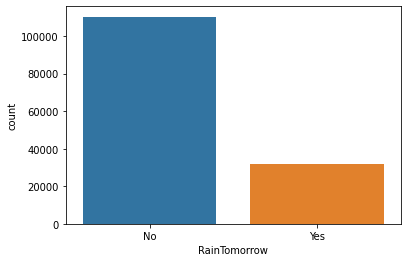

In [9]:
sns.countplot(df.RainTomorrow)

In [ ]:
df.RainTomorrow.value_counts()/df.shape[0]    #percenatge calculation

0.0    0.778762
1.0    0.221238
Name: RainTomorrow, dtype: float64

In [ ]:
X=df[['Rainfall','Humidity3pm','Pressure9am','RainToday']]        #building model
Y=df[['RainTomorrow']]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=RANDOM_SEED)

In [ ]:
X_train.shape

(99751, 4)

In [ ]:
X_train=torch.from_numpy(X_train.to_numpy()).float()
X_test=torch.from_numpy(X_test.to_numpy()).float()
Y_train=torch.squeeze(torch.from_numpy(Y_train.to_numpy()).float())    #drop the unwanted column
Y_test=torch.squeeze(torch.from_numpy(Y_test.to_numpy()).float())

In [ ]:
print(X_train.shape,Y_train.shape)

torch.Size([99751, 4]) torch.Size([99751])


#BUILDING NEURAL NETWORK


In [ ]:
class net(nn.Module):

  def __init__(self, n_features):          #consructing layers
    super(net,self).__init__() #super constructor called
    self.fc1= nn.Linear(n_features, 5)   #first layer with 5 output layer (hit and trial)
    self.fc2=nn.Linear(5, 3)
    self.fc3=nn.Linear(3,1)

  def forward(self, x):      #takes x and passes through layers
    x=F.relu(self.fc1(x))     #activation function that helps one to break from linear world and estimate non linear world scenario
    x=F.relu(self.fc2(x))     #ReLU(x)=max(0,x)

    return torch.sigmoid(self.fc3(x))





In [ ]:
net= net(X_train.shape[1])   #no.of features

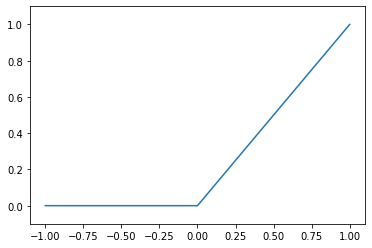

In [ ]:
ax = plt.gca()

plt.plot(
  np.linspace(-1, 1, 5), 
  F.relu(torch.linspace(-1, 1, steps=5)).numpy()
)
ax.set_ylim([-0.1, 1.1]);

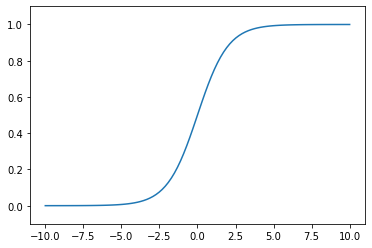

In [ ]:
ax = plt.gca()

plt.plot(
  np.linspace(-10, 10, 100), 
  torch.sigmoid(torch.linspace(-10, 10, steps=100)).numpy()
)
ax.set_ylim([-0.1, 1.1]);

In [ ]:
criterion = nn.BCELoss()           #loss function that measures difference between two binary vectors.
# the predictions of our model and the real values. values output by sigmoid,The closer this value gets to 0, the better your model should be.

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)  #learning rate,tradeoff between how good parameters you're going to find and how fast you'll get there.
#optismiser job is to find better paramteres

In [ ]:
!nvidia-smi

Tue Feb 16 07:57:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |    970MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#GPU

In [ ]:
device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train=X_train.to(device)
Y_train=Y_train.to(device)
X_test=X_test.to(device)
Y_test=Y_test.to(device)

In [ ]:
!nvidia-smi

Tue Feb 16 07:57:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |    970MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
net=net.to(device)
criterion=criterion.to(device)

#TRAINING DATA

In [ ]:
def calculate_accuracy(y_true, y_pred):
  predicted= y_pred.ge(.5).view(-1)    #conversion into binary with threshold 0.5 if less then 0 else 1
  return (y_true == predicted).sum().float()/len(y_true) 

def round_tensor(t, decimal_places=3):
  return round(t.item(),decimal_places)

for epoch in range(1000):       #the number of epochs will be all the time we are going to show our data to training model
  Y_pred=net(X_train)
  
  Y_pred=torch.squeeze(Y_pred)
  train_loss=criterion(Y_pred,Y_train)
  
  if epoch %100==0:
     train_acc = calculate_accuracy(Y_train, Y_pred)

  Y_test_pred = net(X_test)
  Y_test_pred = torch.squeeze(Y_test_pred)

  test_loss = criterion(Y_test_pred, Y_test)
  test_acc = calculate_accuracy(Y_test, Y_test_pred)
  print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')

  optimizer.zero_grad()   #gradient decent- trying to fnd better parameteres

  train_loss.backward() #propogate error currently made, adjust thode paramter values
  optimizer.step()

epoch 0
Train set - loss: 10.594, accuracy: 0.221
Test  set - loss: 10.589, accuracy: 0.222

epoch 1
Train set - loss: 9.997, accuracy: 0.221
Test  set - loss: 9.992, accuracy: 0.222

epoch 2
Train set - loss: 9.403, accuracy: 0.221
Test  set - loss: 9.399, accuracy: 0.222

epoch 3
Train set - loss: 8.813, accuracy: 0.221
Test  set - loss: 8.809, accuracy: 0.222

epoch 4
Train set - loss: 8.227, accuracy: 0.221
Test  set - loss: 8.223, accuracy: 0.222

epoch 5
Train set - loss: 7.644, accuracy: 0.221
Test  set - loss: 7.641, accuracy: 0.222

epoch 6
Train set - loss: 7.065, accuracy: 0.221
Test  set - loss: 7.062, accuracy: 0.222

epoch 7
Train set - loss: 6.489, accuracy: 0.221
Test  set - loss: 6.486, accuracy: 0.222

epoch 8
Train set - loss: 5.918, accuracy: 0.221
Test  set - loss: 5.915, accuracy: 0.222

epoch 9
Train set - loss: 5.35, accuracy: 0.221
Test  set - loss: 5.347, accuracy: 0.222

epoch 10
Train set - loss: 4.786, accuracy: 0.221
Test  set - loss: 4.784, accuracy: 0.22

#EVALUATION- IF MODEL IS GOOD OR NOT


In [ ]:
classes = ['No rain', 'Raining']

Y_pred = net(X_test)

Y_pred = Y_pred.ge(.5).view(-1).cpu()       #convert to 0 and 1 based on threshold 0.5
Y_test = Y_test.cpu()

print(classification_report(Y_test, Y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.95      0.90     19413
     Raining       0.72      0.42      0.53      5525

    accuracy                           0.84     24938
   macro avg       0.79      0.69      0.72     24938
weighted avg       0.82      0.84      0.82     24938



#some hypothetical examples:

In [ ]:
def will_it_rain(rainfall, humidity, rain_today, pressure):
  t = torch.as_tensor([rainfall, humidity, rain_today, pressure]) \
      .float() \
      .to(device)
  output = net(t)
  return output.ge(0.5).item()

In [ ]:
will_it_rain(rainfall=10, humidity=10, rain_today=True, pressure=2)

True

In [ ]:
will_it_rain(rainfall=0, humidity=1, rain_today=False, pressure=100)

True

#however data is imbalanced and one cannot rely on the same
